<a href="https://colab.research.google.com/github/shahnawazsyed/MAT422/blob/main/Joint_Probability_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.3 Joint Probability Distributions**


*   Joint Probability Distributions
*   Correlation and dependence
*   Random samples



In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.integrate import dblquad
import seaborn as sns

# **Joint Probability Distributions**


The PMF of a single discrete random variable *X* can be extended to two variables *X*, *Y* to describe the probability mass on each possible pair of values (*x*,*y*):

$p(x,y) = P(X = x$ and $Y = y)$

for $p(x,y) ≥ 1$ and $Σ_xΣ_yp(x,y)=1$

If *x* and *y* are continuous random variables, the joint probability mass function is:

$p(x,y ∈ A) = ∫∫_Af(x,y)dxdy$

where A is a two dimensional set.

Probability of rolling a 4 on Dice 1 and a 6 on Dice 2: 0.028


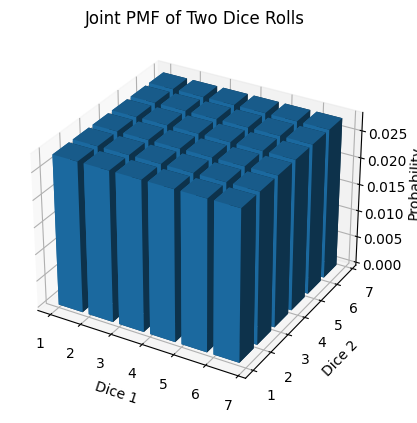

Probability that X and Y are both in [-1, 1]: 0.498


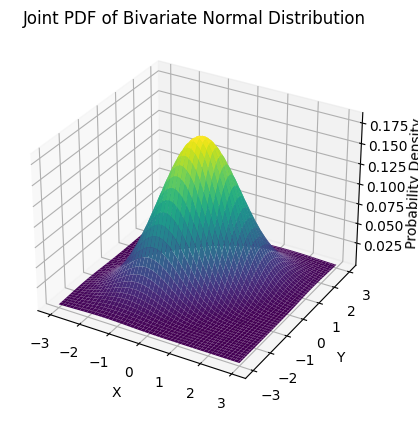

In [14]:
def joint_pmf(): #Discrete Joint Distribution (Probability mass function)
    # Discrete variables (two dice roles)
    x_values = np.arange(1, 7)
    y_values = np.arange(1, 7)

    #Joint PMF is uniform (1/36 for each outcome)
    pmf = np.full((6, 6), 1/36)

    dice_1_value = 4  #dice 1 rolls 4
    dice_2_value = 6  #dice 2 rolls 6
    probability = pmf[dice_1_value - 1, dice_2_value - 1]
    print(f"Probability of rolling a 4 on Dice 1 and a 6 on Dice 2: {round(probability, 3)}")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(x_values, y_values)
    ax.bar3d(X.flatten(), Y.flatten(), np.zeros_like(pmf.flatten()), 0.8, 0.8, pmf.flatten())

    ax.set_xlabel('Dice 1')
    ax.set_ylabel('Dice 2')
    ax.set_zlabel('Probability')
    ax.set_title('Joint PMF of Two Dice Rolls')
    plt.show()

def joint_pdf(): #Continuous Joint Distribution (Probability density function, using bivariate normal distribution)
    #Parameters for distribution
    mean = [0, 0]
    cov = [[1, 0.5], [0.5, 1]]

    #Generate x and y values
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)

    #Create distribution
    pos = np.dstack((X, Y))
    rv = multivariate_normal(mean, cov)
    Z = rv.pdf(pos)

    def bivariate_normal_pdf(x, y):
        return rv.pdf([x, y])

    prob_region, _ = dblquad(bivariate_normal_pdf, -1, 1, lambda x: -1, lambda x: 1)
    print(f"Probability that X and Y are both in [-1, 1]: {round(prob_region, 3)}")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Probability Density')
    ax.set_title('Joint PDF of Bivariate Normal Distribution')
    plt.show()

joint_pmf()
print("\n")
joint_pdf()

# **Correlation and Dependence**

The covariance between two random variables *X* and *Y* is:

$Cov(X,Y)=E[(X-\mu_X)(Y-\mu_Y)]$

$=\Sigma_x \Sigma_y(x-\mu_x)(y-\mu_y)p(x,y)$, where X and Y are discrete

$=\int_{-∞}^{∞} \int_{-∞}^{∞}(x-\mu_x)(y-\mu_y)f(x,y)dxdy$, where X and Y are continuous

The correlation coefficient of X and Y is:

$Corr(X,Y)=\rho_{X,Y}=\frac{Cov(X,Y)}{σ_X \cdot \sigma_Y}$

If X and Y are independent, then ρ = 0.

In [15]:
import numpy as np

def covariance_correlation_discrete(x, y):
  cov = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) - 1)
  corr = cov / (np.std(x, ddof=1) * np.std(y, ddof=1))
  return cov, corr

def covariance_correlation_continuous(x, y):
  cov = np.sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) - 1)
  corr = cov / (np.std(x, ddof=1) * np.std(y, ddof=1))
  return cov, corr

#Discrete variables
x_discrete = np.array([1, 2, 3, 4, 5])
y_discrete = np.array([2, 4, 6, 8, 10])
covariance_discrete, correlation_discrete = covariance_correlation_discrete(x_discrete, y_discrete)
print(f"Discrete Covariance: {covariance_discrete}, Correlation: {correlation_discrete}")

#Continuous variables
x_continuous = np.array([1.2, 2.5, 3.7, 4.1, 5.9])
y_continuous = np.array([2.1, 4.3, 6.2, 8.5, 10.7])
covariance_continuous, correlation_continuous = covariance_correlation_continuous(x_continuous, y_continuous)
print(f"Continuous Covariance: {covariance_continuous}, Correlation: {correlation_continuous}")

Discrete Covariance: 5.0, Correlation: 0.9999999999999998
Continuous Covariance: 5.881499999999999, Correlation: 0.9849493507082375


# **Random Samples**

A simple random sample is one where, for random variables $X_1, X_2,..., X_n$:

1. The $X_i$'s are independent random variables
2. Every $X_i$ has the same probability distribution

Let $X_1, X_2,..., X_n$ be a random sample from a distribution with mean $\mu$ and standard deviation $\sigma$. This means that:

1. $E(\bar{X}) = \mu_{\bar{X}}=\mu$
2. $V(\bar{X}) = \sigma^2_{\bar{X}}=\sigma^2/n$ and $\sigma_{\bar{X}} = \sigma/\sqrt{n}$

The central limit theorem (CLT) states that a normalized sum of independent random variables tends towards a normal distribution.

Let $X_1, X_2,..., X_n$ be a random sample from a distribution with mean $\mu$ and standard deviation $\sigma$. For a sufficiently large *n*, $\bar{X}$ has an approximately normal distribution with $\mu_{\bar{X}}=\mu$ and $\sigma^2_{\bar{X}}=\sigma^2/n$.

We can demonstate the CLT by taking a non-normal distribution and showing how the sample means approach a normal distribution as *n* increases

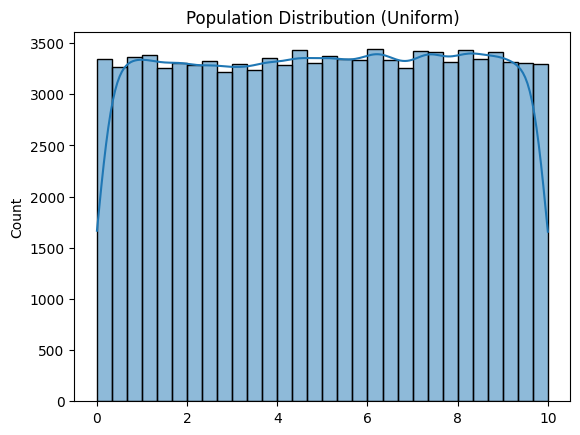

In [22]:
#Generate population (uniform distribution) from which to draw samples
population = np.random.uniform(low=0, high=10, size=100000)
sns.histplot(population, bins=30, kde=True)
plt.title('Population Distribution (Uniform)')
plt.show()

Note how the above distribution is clearly not normal.

We now draw samples and take their means. For demonstration, start with 1000 samples of 30 each.

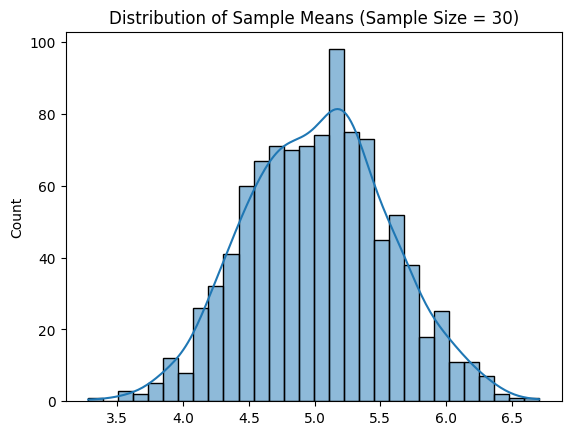

In [23]:
num_samples = 1000
sample_size = 30

sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_means.append(np.mean(sample))

sns.histplot(sample_means, bins=30, kde=True)
plt.title(f'Distribution of Sample Means (Sample Size = {sample_size})')
plt.show()

In the above figure, note the blue line showing an almost normal distribution. We can observe the behavior of the distribution of sample means as we adjust *n*:

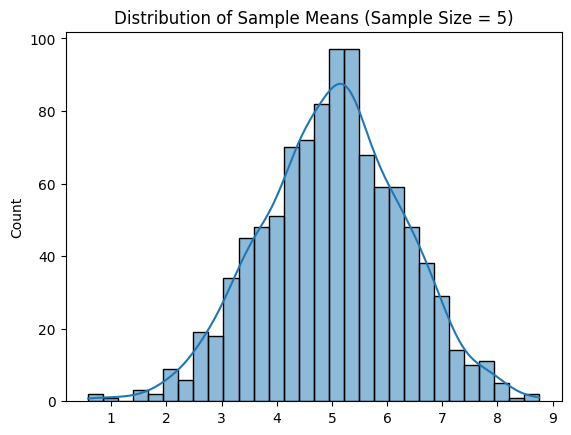

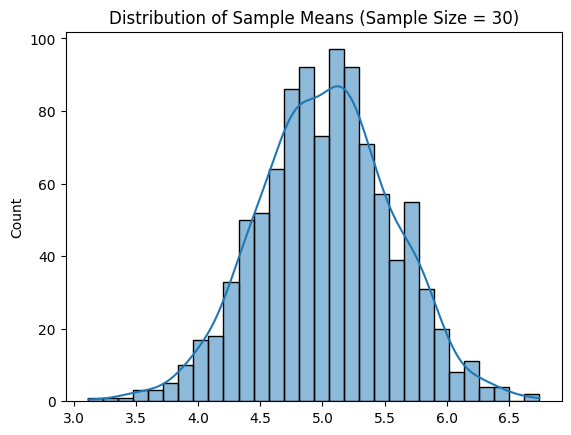

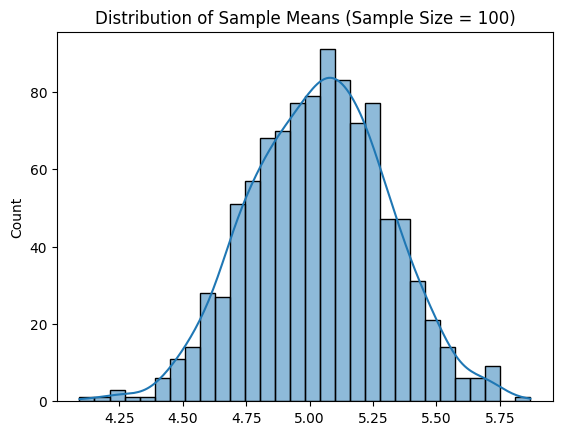

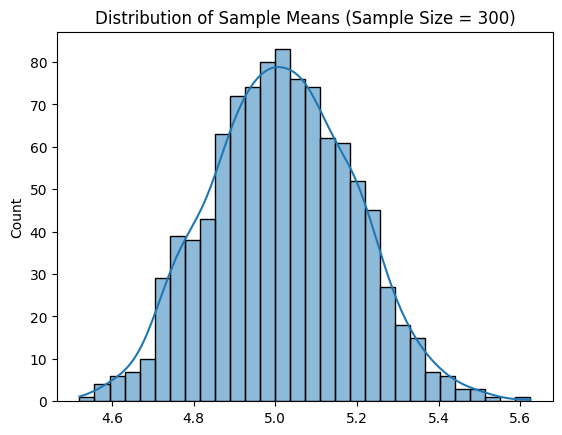

In [24]:
sample_sizes = [5, 30, 100, 300] #comparing different sample sizes

for size in sample_sizes:
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=size)
        sample_means.append(np.mean(sample))

    sns.histplot(sample_means, bins=30, kde=True)
    plt.title(f'Distribution of Sample Means (Sample Size = {size})')
    plt.show()
